In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.__version__

'2.9.2'

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 56s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
def plot_sample(index):
    plt.figure(figsize = (10,3))
    plt.imshow(X_train[index])

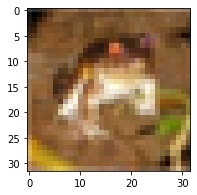

In [20]:
plot_sample(0)

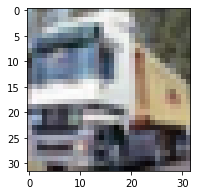

In [21]:
plot_sample(1)

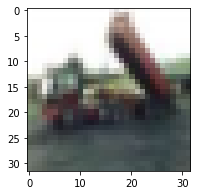

In [22]:
plot_sample(2)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
classes[y_train[3][0]]

'deer'

In [28]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [32]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

In [34]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [35]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 42ms/step - loss: 1.8134 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.6226 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5431 - accuracy: 0.4535
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4789 - accuracy: 0.4801
Epoch 5/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4300 - accuracy: 0.4987


In [36]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 3s 9ms/step


3

In [39]:
y_test[0][0]

3

In [38]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 3s 9ms/step


'cat'

In [40]:
classes[y_test[0][0]]

'cat'

In [41]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 66s 42ms/step - loss: 1.8141 - accuracy: 0.3535
1min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [43]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 66s 42ms/step - loss: 1.8073 - accuracy: 0.3572
1min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [44]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.8151 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.6246 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5419 - accuracy: 0.4581
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4827 - accuracy: 0.4756
Epoch 5/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4351 - accuracy: 0.4953
5min 31s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [45]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.8104 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.6215 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5397 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4806 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4308 - accuracy: 0.4972
5min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
